# Задание
Создать приложение, которое будет из готового файла с данными «Сбербанка» выводить результат по параметрам:
- Тип данных
- Интервал дат

Область визуализировать выводимые данные с помощью графика

# Подготока

### Подключение библиотек

In [19]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.style
# %config InlineBackend.figure_format = 'svg'

In [20]:
DATASET_PATH = 'opendata.csv'
df = pd.read_csv(DATASET_PATH, encoding='Windows-1251')
df['date'] = df['date'].astype('datetime64[ns]')

In [24]:
def graf(date_start, date_end, name, region):
    '''
    Функция строит график по заданным параметрам:
    name = тип данных или его номер,
    region = Регион РФ или Россия,
    date_start = начальная дата выборки,
    date_end = конечная дата выборки
    '''
    if type(name) == int:
        name = data_types[name]
    filter_date = (df['date'] > date_start) & (df['date'] < date_end)
    filter_name = df['name'] == name
    filter_reg = df['region'] == region
    df_2 = df.loc[filter_date & filter_reg & filter_name]
    df_3 = df.loc[filter_date & (df['region'] == 'Россия') & filter_name]
    
    plt.figure(figsize=(12,4))
    plt.plot(df_2['date'],df_2['value'], label = region)
    plt.plot(df_3['date'],df_3['value'], label = 'Россия')
    
    plt.legend()
    plt.title(f'Данные: {name} за период с {date_start} по {date_end} по региону')
    plt.grid();

# Список типов

In [27]:
# pd.DataFrame.from_dict({'Регион': df['region'].value_counts().index.sort_values().tolist()})

In [28]:
data_types = df['name'].value_counts().index.sort_values().tolist()
pd.DataFrame.from_dict({'Тип данных': data_types})

,Тип данных
0,В среднем депозитов в руб. на человека
1,В среднем руб. на текущем счете на человека
2,Количество заявок на ипотечные кредиты
3,Количество заявок на потребительские кредиты
4,Количество новых депозитов
5,Средние расходы по картам
6,Средние траты в ресторане
7,Средние траты в ресторане фастфуд
8,Средний чек в формате Ресторан
9,Средний чек в формате Фастфуд


# Функция строит график по заданным параметрам:
- `name` = тип данных или его номер из таблицы выше,
- `region` = Регион РФ или `Россия`,
- `date_start` = начальная дата выборки,
- `date_end` = конечная дата выборки

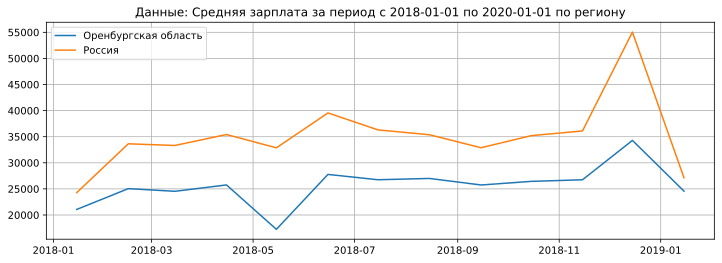

In [33]:
graf(
    name = 10,
    region = 'Оренбургская область',
    date_start = '2018-01-01',
    date_end = '2020-01-01'
)